<a href="https://colab.research.google.com/github/ton0178/colab/blob/main/GoSoft_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
app = pd.read_csv(r"/content/historical_data.csv")


In [ ]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
app.columns

In [ ]:
app.shape

(307511, 122)

In [ ]:
app.isnull().sum().sort_values()

In [ ]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values())
msng_info

In [ ]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.head(10)

In [ ]:
msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True   )
msng_info.head(10)

In [ ]:
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0]*100
msng_info

In [ ]:
len(msng_info[msng_info['msng_pct'] >= 40])

49

In [ ]:
msng_col = msng_info[msng_info['msng_pct'] >= 40]['col_name'].to_list()
msng_col

In [ ]:
app_msng_rmvd = app.drop(labels = msng_col,axis =1)
app_msng_rmvd.shape

(307511, 73)

In [ ]:
app_msng_rmvd.columns

In [ ]:
app_msng_rmvd.head()

In [ ]:
flag_col = []
for col in app_msng_rmvd.columns:
  if col.startswith("FLAG_"):
    flag_col.append(col)
len(flag_col)

28

In [ ]:
app_msng_rmvd[flag_col].head()

In [ ]:
flaq_tgt_col = app_msng_rmvd[flag_col+['TARGET']]
flaq_tgt_col.head()

In [ ]:
flaq_tgt_col = app_msng_rmvd[flag_col+['TARGET']]
flaq_tgt_col.columns

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'TARGET'],
      dtype='object')

In [ ]:
flaq_tgt_col.groupby(['FLAG_OWN_CAR','TARGET']).count()   #pivot table

FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  \
FLAG_OWN_CAR TARGET                                                
N            0                185675      185675          185675   
             1                 17249       17249           17249   
Y            0                 97011       97011           97011   
             1                  7576        7576            7576   

                     FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
FLAG_OWN_CAR TARGET                                                  
N            0                185675            185675      185675   
             1                 17249             17249       17249   
Y            0                 97011             97011       97011   
             1                  7576              7576        7576   

                     FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
FLAG_OWN_CAR TARGET                                                 
N            0           185675           185675           185675   
             1            17249            17249            17249   
Y            0            97011            97011            97011   
             1             7576             7576             7576   

                     FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
FLAG_OWN_CAR TARGET                                                      
N            0                185675           185675           185675   
             1                 17249            17249            17249   
Y            0                 97011            97011            97011   
             1                  7576             7576             7576   

                     FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
FLAG_OWN_CAR TARGET                                                      
N            0                185675           185675           185675   
             1                 17249            17249            17249   
Y            0                 97011            97011            97011   
             1                  7576             7576             7576   

                     FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
FLAG_OWN_CAR TARGET                                                         
N            0                 185675            185675            185675   
             1                  17249             17249             17249   
Y            0                  97011             97011             97011   
             1                   7576              7576              7576   

                     FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
FLAG_OWN_CAR TARGET                                                         
N            0                 185675            185675            185675   
             1                  17249             17249             17249   
Y            0                  97011             97011             97011   
             1                   7576              7576              7576   

                     FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
FLAG_OWN_CAR TARGET                                                         
N            0                 185675            185675            185675   
             1                  17249             17249             17249   
Y            0                  97011             97011             97011   
             1                   7576              7576              7576   

                     FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
FLAG_OWN_CAR TARGET                                                        
N            0                 185675            185675            185675  
             1                  17249             17249             17249  
Y            0                  97011             97011             97011  
             1                   7576              7576              7576

In [ ]:
flaq_tgt_col.head()

In [ ]:
sns.countplot(data=flaq_tgt_col,x= 'FLAG_OWN_CAR',hue='TARGET' )

In [ ]:
len(flag_col)

28

In [ ]:
for i,col in enumerate(flag_col):
  print(i,col)

In [ ]:
plt.figure(figsize=(20,25))

for i,col in enumerate(flag_col):
  plt.subplot(7,4,i+1)
  sns.countplot(data=flaq_tgt_col,x= col,hue='TARGET' )

In [ ]:
flg_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = app_msng_rmvd[flg_corr]
flag_corr_df.head()

In [ ]:
flag_corr_df.groupby( ['FLAG_OWN_CAR'] ).size()

In [ ]:
flag_corr_df.groupby( ['FLAG_OWN_REALTY'] ).size()

In [ ]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

In [ ]:
flag_corr_df.head()

In [ ]:
corr_df = round( flag_corr_df.corr(),2 )
corr_df

In [ ]:
sns.heatmap(corr_df,cmap='coolwarm',linewidths=.5,annot=True)  #28ตัวนี้ drop ทิ้งได้เลย

In [ ]:
app_flag_rmvd = app_msng_rmvd.drop(labels = flag_col,axis=1)
app_flag_rmvd.shape   #73-28 = 45

(307511, 45)

In [ ]:
app_flag_rmvd.head()

In [ ]:
#corr_df2 =round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2)
round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2)

In [ ]:
#sns.heatmap(corr_df2,cmap='coolwarm',linewidths=.5,annot=True)
sns.heatmap(round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2) ,cmap='coolwarm',linewidths=.5,annot=True)

In [ ]:
app_score_col_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)

In [ ]:
app_score_col_rmvd.shape  # 45-2 = 43

(307511, 43)

In [ ]:
app_score_col_rmvd.isnull().sum().sort_values() / app_score_col_rmvd.shape[0]  # ค่าว่าง / ทั้งหมด

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [ ]:
app_score_col_rmvd.groupby(['CNT_FAM_MEMBERS']).size().sort_values()

CNT_FAM_MEMBERS
15.0         1
13.0         1
11.0         1
20.0         2
14.0         2
12.0         2
16.0         2
10.0         3
9.0          6
8.0         20
7.0         81
6.0        408
5.0       3478
4.0      24697
3.0      52601
1.0      67847
2.0     158357
dtype: int64

In [ ]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
app_score_col_rmvd['CNT_FAM_MEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna((app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0]))   #แทนที่คนที่ไม่ได้ตอบ  ด้วยค่า mod ค่าซ้ำมากสุด

In [ ]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].isnull().sum()    #ตรวจสอบการ Replace

0

In [ ]:
app_score_col_rmvd.groupby(['OCCUPATION_TYPE']).size().sort_values()

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
dtype: int64

In [ ]:
app_score_col_rmvd['OCCUPATION_TYPE'] = app_score_col_rmvd['OCCUPATION_TYPE'].fillna((app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]))   #แทนที่คนที่ไม่ได้ตอบ  ด้วยค่า mod ค่าซ้ำมากสุด

In [ ]:
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()    #ตรวจสอบการ Replace

0

In [ ]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()    #ตรวจสอบการ Replace

1292

In [ ]:
app_score_col_rmvd.groupby(['NAME_TYPE_SUITE']).size().sort_values()

NAME_TYPE_SUITE
Group of people       271
Other_A               866
Other_B              1770
Children             3267
Spouse, partner     11370
Family              40149
Unaccompanied      248526
dtype: int64

In [ ]:
app_score_col_rmvd['NAME_TYPE_SUITE'] = app_score_col_rmvd['NAME_TYPE_SUITE'].fillna((app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0]))   #แทนที่คนที่ไม่ได้ตอบ  ด้วยค่า mod ค่าซ้ำมากสุด

In [ ]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()    #ตรวจสอบการ Replace

0

In [ ]:
#AMT_ANNUITY
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

12

In [ ]:
app_score_col_rmvd['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
app_score_col_rmvd['AMT_ANNUITY'] = app_score_col_rmvd['AMT_ANNUITY'].fillna((app_score_col_rmvd['AMT_ANNUITY'].mean()))   #แทนที่คนที่ไม่ได้ตอบ  ด้วยค่า mean เพราะเป็น continue var

In [ ]:
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [ ]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [ ]:
#AMT_REQ_CREDIT_BUREAU_HOUR
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [ ]:
# loop replace var   เก็บใส่ list
amt_req_col = []
for col in app_score_col_rmvd.columns:
  if col.startswith('AMT_REQ_CREDIT_BUREAU'):
    amt_req_col.append(col)

amt_req_col

In [ ]:
for col in amt_req_col:
  app_score_col_rmvd[col]  = app_score_col_rmvd[col].fillna(( app_score_col_rmvd[col].median() ))

In [ ]:
app_score_col_rmvd.isnull().sum().sort_values()

In [ ]:
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

278

In [ ]:
app_score_col_rmvd['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna((app_score_col_rmvd['AMT_GOODS_PRICE'].median()))   #แทนที่คนที่ไม่ได้ตอบ  ใช้ median ข้อมูลต่างกัน 100 เท่า

In [ ]:
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [ ]:
# loop replace var   เก็บใส่ list
day_col = []
for col in app_score_col_rmvd.columns:
  if col.startswith('DAYS'):
    day_col.append(col)

day_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
for col in day_col:
  app_score_col_rmvd[col]  = abs(app_score_col_rmvd[col])
app_score_col_rmvd[day_col].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


In [ ]:
app_score_col_rmvd.shape

(307511, 43)

In [ ]:
app_score_col_rmvd.info()
#Dtype
#object - string
#int64  - integer
#float64 - floating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [ ]:
app_score_col_rmvd.nunique().sort_values()    # รู้ความน่าจะเป็น

In [ ]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size().sort_values()

NAME_CONTRACT_TYPE
Revolving loans     29279
Cash loans         278232
dtype: int64

In [ ]:
#NAME_INCOME_TYPE
app_score_col_rmvd.groupby(['NAME_INCOME_TYPE']).size().sort_values()

NAME_INCOME_TYPE
Maternity leave              5
Businessman                 10
Student                     18
Unemployed                  22
State servant            21703
Pensioner                55362
Commercial associate     71617
Working                 158774
dtype: int64

In [ ]:
app_score_col_rmvd.groupby(['CNT_CHILDREN']).size().sort_values()

CNT_CHILDREN
11         1
8          2
9          2
10         2
12         2
19         2
14         3
7          7
6         21
5         84
4        429
3       3717
2      26749
1      61119
0     215371
dtype: int64

In [ ]:
# แบ่งข้อมูลเป็น  10 quartile
app_score_col_rmvd['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

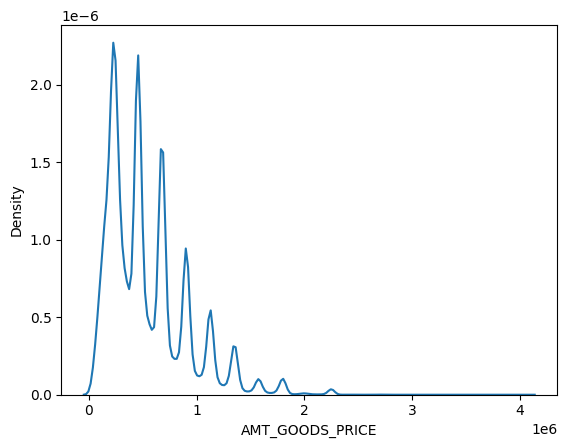

In [ ]:
# plot กราฟก่อน
sns.kdeplot( data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

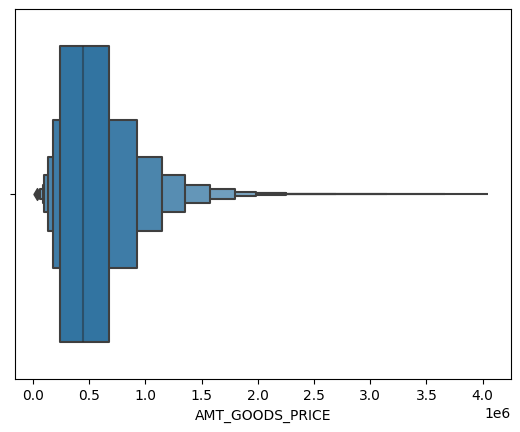

In [ ]:
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')   #0-1  ครอบคลุม 90%

In [ ]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
#AMT_GOODS_PRICE
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 4050000]
ranges = ['0-100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '500K-600K', '600K-700K', '700K-800K', '800K-900K', 'Above900K']

app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'], bins, labels=ranges)

In [ ]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K        8709
100K-200K    32956
200K-300K    62761
300K-400K    21219
400K-500K    57251
500K-600K    13117
600K-700K    40024
700K-800K     8110
800K-900K    21484
Above900K    41880
dtype: int64

In [ ]:
#ทำเอง  AMT_INCOME_TOTAL  ทำ bin ข้อมูล
app_score_col_rmvd['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

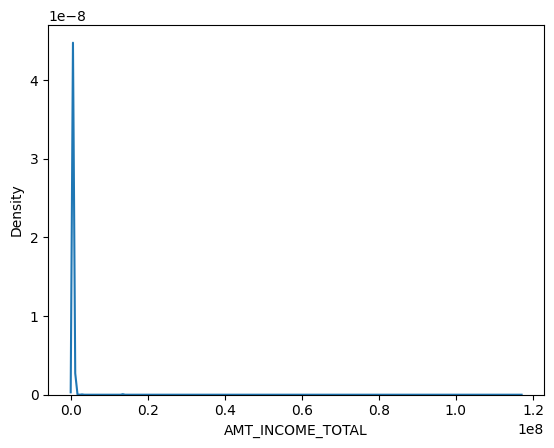

In [ ]:
# plot กราฟก่อน
sns.kdeplot( data=app_score_col_rmvd,x='AMT_INCOME_TOTAL')

<Axes: xlabel='AMT_INCOME_TOTAL'>

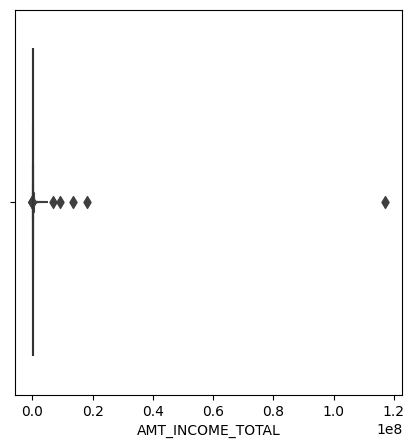

In [ ]:
plt.figure(figsize=(5,5))
sns.boxenplot(data=app_score_col_rmvd,x='AMT_INCOME_TOTAL')


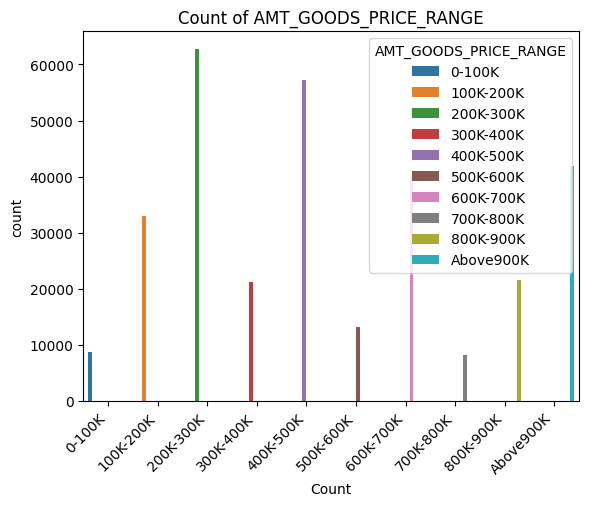

In [ ]:
hue_order = ['0-100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '500K-600K', '600K-700K', '700K-800K', '800K-900K', 'Above900K']
sns.countplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE_RANGE',hue ='AMT_GOODS_PRICE_RANGE',order= hue_order)
plt.xlabel('AMT_GOODS_PRICE_RANGE')
plt.xlabel('Count')
plt.title('Count of AMT_GOODS_PRICE_RANGE')
plt.xticks(rotation=45,ha='right')
plt.show()

AMT_INCOME_TOTAL, AMT_CREDIT,AMT_ANNUITY    เอาไปทำ  binding เพิ่ม  